# –£—Å—Ç–∞–Ω–æ–≤–∫–∞ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö –±–∏–±–ª–∏–æ—Ç–µ–∫ #

In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, DatetimeTickFormatter, Band
from bokeh.layouts import gridplot
import pandas as pd
from datetime import datetime, timedelta
from bokeh.models import HoverTool, DatetimeTickFormatter, Band, ColumnDataSource
import pandas_ta as ta

# –ü–æ–¥–∫–ª—é—á–µ–Ω–∏–µ –∫ –ë–î #

In [2]:
# –ù–∞—Å—Ç—Ä–æ–π–∫–∏ –ø–æ–¥–∫–ª—é—á–µ–Ω–∏—è –∫ –ë–î
host='...'
username='...'
password='...'
database_name='...'

# –°–æ–∑–¥–∞–µ–º –ø–æ–¥–∫–ª—é—á–µ–Ω–∏–µ
connection_string = f'mysql+pymysql://{username}:{password}@{host}/{database_name}'
engine = create_engine(connection_string)

# –í—ã–ø–æ–ª–Ω–µ–Ω–∏–µ SQL-–∑–∞–ø—Ä–æ—Å–∞ –∏ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–µ
sql_query = """
SELECT *
FROM market_data
"""
df = pd.read_sql(sql_query, engine)

# –û—Å–Ω–æ–≤–Ω—ã–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ #

In [4]:
df.info()
# –ü—Ä–æ–ø—É—Å–∫–æ–≤ –Ω–µ—Ç

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2943 entries, 0 to 2942
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   open              2943 non-null   float64       
 1   high              2943 non-null   float64       
 2   low               2943 non-null   float64       
 3   close             2943 non-null   float64       
 4   adj_close         2943 non-null   float64       
 5   volume            2943 non-null   int64         
 6   ticker            2943 non-null   object        
 7   asset_name        2943 non-null   object        
 8   business_date     2943 non-null   object        
 9   created_datetime  2943 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 230.1+ KB


In [7]:
df.describe()

open         high          low        close    adj_close  \
count  2943.000000  2943.000000  2943.000000  2943.000000  2943.000000   
mean    248.913354   251.065831   246.624658   248.930598   246.154568   
min      66.279999    67.699997    63.639999    65.750000    65.750000   
25%      82.459999    83.329998    81.384998    82.439999    82.439999   
50%     124.660004   133.130005   121.370003   123.699997   123.699997   
75%     411.910004   414.104996   409.490005   412.275009   402.720352   
max     605.630005   607.909973   604.950012   607.659973   607.659973   
std     173.655036   174.239206   172.971001   173.694043   171.265506   

             volume               created_datetime  
count  2.943000e+03                           2943  
mean   3.296560e+07  2024-12-05 18:18:30.000000512  
min    0.000000e+00            2024-12-05 18:18:30  
25%    5.978550e+04            2024-12-05 18:18:30  
50%    7.890410e+05            2024-12-05 18:18:30  
75%    6.148230e+07            2024-12-05 18:18:30  
max    2.517839e+08            2024-12-05 18:18:30  
std    3.857124e+07                            NaN

In [8]:
df.describe(include = 'object')

ticker asset_name business_date
count    2943       2943          2943
unique      4          4           737
top      BZ=F      BRENT    2022-01-03
freq      737        737             4

In [11]:
df = df.set_index("business_date")

                 WTI  Nasdaq-100     BRENT   S&P 500
WTI         1.000000   -0.437241  0.991310 -0.418689
Nasdaq-100 -0.437241    1.000000 -0.485653  0.983934
BRENT       0.991310   -0.485653  1.000000 -0.465244
S&P 500    -0.418689    0.983934 -0.465244  1.000000


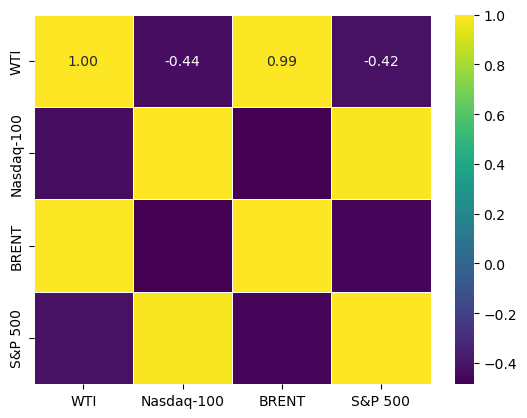

In [20]:
corr = pd.DataFrame({
    "WTI": df[df['asset_name'] == 'WTI']["close"],
    "Nasdaq-100": df[df['asset_name'] == 'Nasdaq-100']["close"],
    "BRENT": df[df['asset_name'] == 'BRENT']["close"],
    "S&P 500": df[df['asset_name'] == 'S&P 500']["close"]
})


print(corr.corr())

# –í—ã—á–∏—Å–ª—è–µ–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É —Ç–æ–ª—å–∫–æ 
if not corr.empty:
    correlation_matrix = corr.corr(numeric_only=True)
    sns.heatmap(correlation_matrix,
               linewidths=0.5,
               annot=True,
               cmap='viridis',
               fmt=".2f",
               annot_kws={'size': 10})
    plt.show()

*–°–∏–ª—å–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É WTI –∏ Brent*

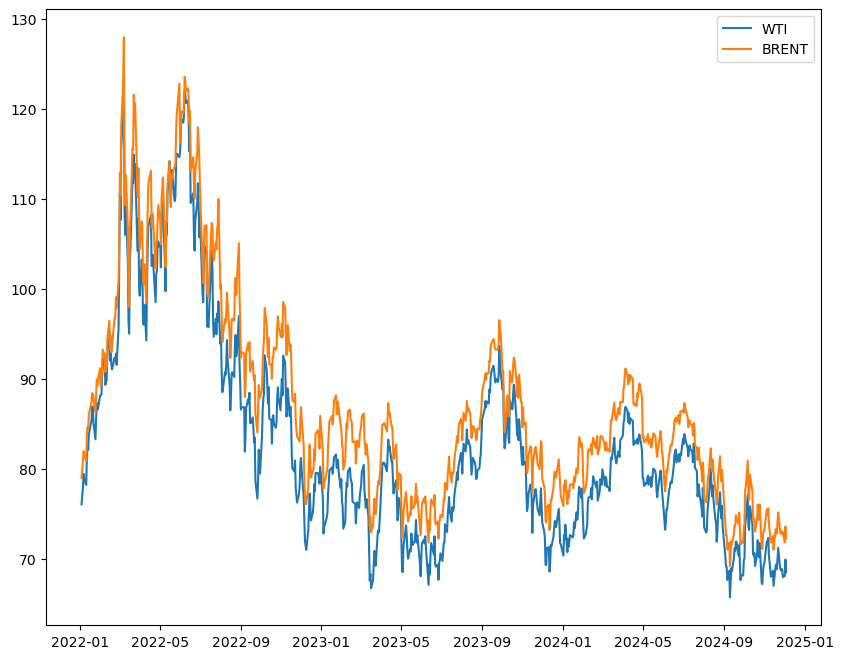

In [22]:
plt.figure(figsize=(10, 8))
plt.plot(df[df['asset_name'] == 'WTI']["close"])
plt.plot(df[df['asset_name'] == 'BRENT']["close"])
plt.legend(["WTI", "BRENT"])

## –†–∞–∑–¥–µ–ª–∏–º –¥–∞—Ç–∞—Å–µ—Ç –Ω–∞ 4 –≥—Ä—É–ø–ø—ã –ø–æ —Ç–∏–ø–∞–º —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ–º—ã—Ö –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π ##

In [85]:
WTI = df[df['asset_name'] == 'WTI']
Nasdaq = df[df['asset_name'] == 'Nasdaq-100']
BRENT = df[df['asset_name'] == 'BRENT']
SP500 = df[df['asset_name'] == 'S&P 500']

# –†–∞—Å—á–µ—Ç –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π –ø—Ä–∏ –ø–æ–º–æ—â–∏ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ pandas_ta #  

## RSI ## 
–ò–Ω–¥–∏–∫–∞—Ç–æ—Ä RSI –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Å–∏–ª—É —Ç—Ä–µ–Ω–¥–∞ –∏ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –µ–≥–æ —Å–º–µ–Ω—ã (https://ru.tradingview.com/chart/BTCUSD/Eq8tysZA-indikator-rsi-sekrety-torgovli-pravila-primeneniya-polnyj-razbor/):

- *–ï—Å–ª–∏ –∑–Ω–∞—á–µ–Ω–∏–µ –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä–∞ –ø–æ–¥–Ω–∏–º–∞–µ—Ç—Å—è –∫ 70 –∏ –≤—ã—à–µ - –∞–∫—Ç–∏–≤ –ø–µ—Ä–µ–∫—É–ø–ª–µ–Ω –∏ –≤—Ö–æ–¥–∏—Ç—å –≤ –ø–æ–∫—É–ø–∫–∏ —Å–µ–π—á–∞—Å –Ω–µ–±–ª–∞–≥–æ—Ä–∞–∑—É–º–Ω–æ, –∞ –µ—â–µ –ª—É—á—à–µ - –Ω—É–∂–Ω–æ –≤—ã—Ö–æ–¥–∏—Ç—å –∏–∑ –∞–∫—Ç–∏–≤–∞*/ ‚Ä®‚Ä®

- *–ï—Å–ª–∏ –∑–Ω–∞—á–µ–Ω–∏–µ –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä–∞ –æ–ø—É—Å–∫–∞–µ—Ç—Å—è –Ω–∏–∂–µ 30 - –∞–∫—Ç–∏–≤ –ø–µ—Ä–µ–ø—Ä–æ–¥–∞–Ω –∏ –≤—ã —Ä–∏—Å–∫—É–µ—Ç–µ –ø—Ä–æ–¥–∞—Ç—å –µ–≥–æ –Ω–∞ —Å–∞–º–æ–º –¥–Ω–µ. –≠—Ç–æ —Ö–æ—Ä–æ—à–∞—è –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å, —á—Ç–æ–±—ã —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—Ç—å –ø–æ–∫—É–ø–∫–∏*/

–ï—â–µ –æ–¥–∏–Ω –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–π —Å–∏–≥–Ω–∞–ª –æ—Ç –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä–∞ RSI - –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è —Ç–µ–∫—É—â–µ–π —Ç–µ–Ω–¥–µ–Ω—Ü–∏–∏. ‚Ä®‚Ä® –ü—Ä–∏–Ω—è—Ç–æ —Å—á–∏—Ç–∞—Ç—å, —á—Ç–æ –µ—Å–ª–∏ –∑–Ω–∞—á–µ–Ω–∏–µ –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä–∞ –ø–µ—Ä–µ—Å–µ–∫–∞–µ—Ç –æ—Ç–º–µ—Ç–∫—É –≤ 50 - —Ç–æ —Ç—Ä–µ–Ω–¥ –º–µ–Ω—è–µ—Ç—Å—è. –î–æ–≤–æ–ª—å–Ω–æ —á–∞—Å—Ç–æ –º–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å, –∫–∞–∫ –ø—Ä–∏ —Å–∏–ª—å–Ω—ã—Ö —Ç—Ä–µ–Ω–¥–∞—Ö —Ü–µ–Ω–∞ –Ω–∞—Ö–æ–¥–∏—Ç –ø–æ–¥–¥–µ—Ä–∂–∫—É/—Å–æ–ø—Ä–æ—Ç–∏–≤–ª–µ–Ω–∏–µ –Ω–∞ —ç—Ç–æ–º —É—Ä–æ–≤–Ω–µ.

üìä–ù–ê–•–û–ñ–î–ï–ù–ò–ï –î–ò–í–ï–†–ì–ï–ù–¶–ò–ò‚Ä®‚Ä®

–û–¥–∏–Ω –∏–∑ —Å–∞–º—ã—Ö –Ω–∞–¥–µ–∂–Ω—ã—Ö –º–µ—Ç–æ–¥–æ–≤ —Ç–æ—Ä–≥–æ–≤–ª–∏, –∏—Å–ø–æ–ª—å–∑—É—è –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä RSI. –î–∏–≤–µ—Ä–≥–µ–Ω—Ü–∏—è - —ç—Ç–æ –º–æ–º–µ–Ω—Ç —Ä–∞—Å—Ö–æ–∂–¥–µ–Ω–∏—è –∑–Ω–∞—á–µ–Ω–∏–π –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä–∞ –∏ —Ü–µ–Ω—ã, –∫–æ—Ç–æ—Ä–∞—è –Ω–∞–º–µ–∫–∞–µ—Ç –Ω–∞ —Å–∫–æ—Ä—É—é —Å–º–µ–Ω—É —Ç–µ–Ω–¥–µ–Ω—Ü–∏–∏ –≤ —Å—Ç–æ—Ä–æ–Ω—É –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è –∑–Ω–∞—á–µ–Ω–∏—è –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä–∞. ‚Ä®‚Ä®

In [87]:
WTI.loc[:, 'rsi'] = ta.rsi(WTI['close'], timeperiod=14)
Nasdaq.loc[:, 'rsi'] = ta.rsi(Nasdaq['close'], timeperiod=14)
BRENT.loc[:, 'rsi'] = ta.rsi(BRENT['close'], timeperiod=14)
SP500.loc[:, 'rsi'] = ta.rsi(SP500['close'], timeperiod=14)

## SMA, EMA, WMA, DEMA, TEMA  ##
–°–∫–æ–ª—å–∑—è—â–∏–µ —Å—Ä–µ–¥–Ω–∏–µ ‚Äî —ç—Ç–æ —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–∏–µ –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä—ã, –∏—Å–ø–æ–ª—å–∑—É–µ–º—ã–µ –≤ —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–æ–º –∞–Ω–∞–ª–∏–∑–µ –¥–ª—è —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏—è –∫–æ–ª–µ–±–∞–Ω–∏–π —Ü–µ–Ω –∞–∫—Ç–∏–≤–∞ –∏ –≤—ã—è–≤–ª–µ–Ω–∏—è –æ—Å–Ω–æ–≤–Ω—ã—Ö —Ç—Ä–µ–Ω–¥–æ–≤. –û–Ω–∏ —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞—é—Ç—Å—è –ø—É—Ç–µ–º —É—Å—Ä–µ–¥–Ω–µ–Ω–∏—è —Ü–µ–Ω —Ä–∞–∑–ª–∏—á–Ω—ã–º–∏ —Å–ø–æ—Å–æ–±–∞–º–∏ –∑–∞ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã–π –ø–µ—Ä–∏–æ–¥ –≤—Ä–µ–º–µ–Ω–∏.

In [89]:
# SMA 30 –¥–Ω–µ–π
WTI.loc[:, 'sma'] = ta.sma(WTI['close'], length=30)
Nasdaq.loc[:, 'sma'] = ta.sma(Nasdaq['close'], length=30)
BRENT.loc[:, 'sma'] = ta.sma(BRENT['close'], length=30)
SP500.loc[:, 'sma'] = ta.sma(SP500['close'], length=30)
# EMA
WTI.loc[:, 'ema'] = ta.ema(WTI['close'], length=30)
Nasdaq.loc[:, 'ema'] = ta.ema(Nasdaq['close'], length=30)
BRENT.loc[:, 'ema'] = ta.ema(BRENT['close'], length=30)
SP500.loc[:, 'ema'] = ta.ema(SP500['close'], length=30)
# WMA
WTI.loc[:, 'wma'] = ta.wma(WTI['close'], length=30)
Nasdaq.loc[:, 'wma'] = ta.wma(Nasdaq['close'], length=30)
BRENT.loc[:, 'wma'] = ta.wma(BRENT['close'], length=30)
SP500.loc[:, 'wma'] = ta.wma(SP500['close'], length=30)

# DEMA
WTI.loc[:, 'dema'] = ta.dema(WTI['close'], length=30)
Nasdaq.loc[:, 'dema'] = ta.dema(Nasdaq['close'], length=30)
BRENT.loc[:, 'dema'] = ta.dema(BRENT['close'], length=30)
SP500.loc[:, 'dema'] = ta.dema(SP500['close'], length=30)
# TEMA
WTI.loc[:, 'tema'] = ta.tema(WTI['close'], length=30)
Nasdaq.loc[:, 'tema'] = ta.tema(Nasdaq['close'], length=30)
BRENT.loc[:, 'tema'] = ta.tema(BRENT['close'], length=30)
SP500.loc[:, 'tema'] = ta.tema(SP500['close'], length=30)

## –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –¥–ª—è –º–∞—Ä–∫–∏ –Ω–µ—Ñ—Ç–∏ WTI ##

In [31]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import HoverTool, Legend, DatetimeTickFormatter
from datetime import datetime
from datetime import timedelta
output_notebook() 

# –°–æ–∑–¥–∞–µ–º —Ñ–∏–≥—É—Ä—É
p = figure(width=1000, height=600,
           tools="pan,wheel_zoom,box_select,reset,hover",
           title="–ì—Ä–∞—Ñ–∏–∫ RSI, Close –∏ SMA",
           x_axis_type="datetime")  


rsi_line = p.line(x=WTI.index, y=WTI["rsi"], legend_label="RSI", line_color="blue")
ohls_line = p.line(x=WTI.index, y=WTI["close"], legend_label="OHLS", line_color="orange")
sma_line = p.line(x=WTI.index, y=WTI["sma"], legend_label="SMA", line_color="green")

date_19350 = datetime(2022, 1, 1)
date_19750 = datetime(2025, 1, 1)


p.line([date_19350, date_19750], [70, 70], line_dash='dashed', line_color='red', legend_label="–í–µ—Ä—Ö–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞")
p.line([date_19350, date_19750], [50, 50], line_dash='dashed', line_color='blue', legend_label="–°–µ—Ä–µ–¥–∏–Ω–∞")
p.line([date_19350, date_19750], [30, 30], line_dash='dashed', line_color='green', legend_label="–ù–∏–∂–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞")


legend = Legend(items=[
    ("RSI", [rsi_line]),
    ("Close", [ohls_line]),
    ("SMA", [sma_line]),
    ("–í–µ—Ä—Ö–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞", []),
    ("–ù–∏–∂–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞", [])
])
p.add_layout(legend, 'right')

# –ù–∞—Å—Ç—Ä–∞–∏–≤–∞–µ–º –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç hover
hover = p.select_one(HoverTool)
hover.tooltips = [
    ('–î–∞—Ç–∞', '@x{%F}'),
    ('–ó–Ω–∞—á–µ–Ω–∏–µ', '@y')
]
hover.formatters = {
    '@x': 'datetime'
}

# –§–æ—Ä–º–∞—Ç–∏—Ä—É–µ–º –æ—Å—å X
p.xaxis.formatter = DatetimeTickFormatter(days="%d-%m-%Y", months="%d-%m-%Y", years="%d-%m-%Y")

# –ü–æ–∫–∞–∑—ã–≤–∞–µ–º –≥—Ä–∞—Ñ–∏–∫
show(p)

Loading BokehJS ...

## MACD –∏ Stochastic##
MACD ‚Äî —ç—Ç–æ –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä, –∫–æ—Ç–æ—Ä—ã–π –æ—Ç—Å–µ–∏–≤–∞–µ—Ç –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–µ –∫—Ä–∞—Ç–∫–æ—Å—Ä–æ—á–Ω—ã–µ –¥–≤–∏–∂–µ–Ω–∏—è —Ü–µ–Ω—ã –∏ –ø–æ–∑–≤–æ–ª—è–µ—Ç –∫—É–ø–∏—Ç—å –∏–ª–∏ –ø—Ä–æ–¥–∞—Ç—å –∞–∫—Ç–∏–≤ –Ω–∞ –ø–µ—Ä–≤—ã—Ö —ç—Ç–∞–ø–∞—Ö –Ω–æ–≤–æ–≥–æ —Ç—Ä–µ–Ω–¥–∞.
Stochastic ‚Äî —ç—Ç–æ –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä, –∫–æ—Ç–æ—Ä—ã–π –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, –Ω–∞—Å–∫–æ–ª—å–∫–æ —Ç–µ–∫—É—â–∞—è —Ü–µ–Ω–∞ –≤—ã–±—Ä–∞–Ω–Ω–æ–≥–æ –∞–∫—Ç–∏–≤–∞ –±–ª–∏–∑–∫–∞ –∫ —Å–≤–æ–∏–º –º–∞–∫—Å–∏–º—É–º–∞–º –∏–ª–∏ –º–∏–Ω–∏–º—É–º–∞–º –∑–∞ —É—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–Ω—ã–π –ø–µ—Ä–∏–æ–¥. –ë–ª–∞–≥–æ–¥–∞—Ä—è Stochastic –∏–Ω–≤–µ—Å—Ç–æ—Ä—ã –º–æ–≥—É—Ç –±—ã—Å—Ç—Ä–æ –∑–∞–º–µ—Ç–∏—Ç—å —Å–º–µ–Ω—É —Ç—Ä–µ–Ω–¥–∞  —Å –≤–æ—Å—Ö–æ–¥—è—â–µ–≥–æ –Ω–∞ –Ω–∏—Å—Ö–æ–¥—è—â–∏–π –∏–ª–∏ –Ω–∞–æ–±–æ—Ä–æ—Ç 

In [91]:
def calculate_indicators(df, fast_period=12, slow_period=26, signal_period=9, stoch_k_period=14, stoch_d_period=3):
    df.loc[:,'MACD'] = ta.macd(df['close'], fast=fast_period, slow=slow_period, signal=signal_period)['MACD_12_26_9']
    df.loc[:,'MACD_Signal'] = ta.macd(df['close'], fast=fast_period, slow=slow_period, signal=signal_period)['MACDs_12_26_9']
    df.loc[:,'Stochastic_K'] = ta.stoch(df['high'], df['low'], df['close'], k=stoch_k_period, d=stoch_d_period)['STOCHk_14_3_3']
    df.loc[:,'Stochastic_D'] = ta.stoch(df['high'], df['low'], df['close'], k=stoch_k_period, d=stoch_d_period)['STOCHd_14_3_3']
    return df

WTI = calculate_indicators(WTI)
Nasdaq = calculate_indicators(Nasdaq)
BRENT = calculate_indicators(BRENT)
SP500 = calculate_indicators(SP500)

In [49]:
WTI.loc[:,'date'] = pd.to_datetime(WTI.index)
source = ColumnDataSource(data=WTI.to_dict('list'))

# –ì—Ä–∞—Ñ–∏–∫–∏
p1 = figure(width=800, height=300, title="close", x_axis_type="datetime")
p2 = figure(width=800, height=300, title="Stochastic %K & %D", x_axis_type="datetime", x_range=p1.x_range)

# –ü–µ—Ä–≤—ã–π –≥—Ä–∞—Ñ–∏–∫
p1.line(x='date', y='close', source=source, legend_label="close", line_color="orange")

# –í—Ç–æ—Ä–æ–π –≥—Ä–∞—Ñ–∏–∫
p2.line(x='date', y='Stochastic_K', source=source, line_dash='dashed', legend_label="%K", line_color="blue")
p2.line(x='date', y='Stochastic_D', source=source, legend_label="%D", line_color="green")

# –ü–æ–ª–æ—Å—ã –¥–ª—è Stochastic
band = Band(lower=20, upper=80, fill_color='lightgreen', fill_alpha=0.2)
p2.add_layout(band)

# HoverTool
hover = HoverTool(tooltips=[("–î–∞—Ç–∞", "@date{%F}")], formatters={"@date": "datetime"})
p1.add_tools(hover)
p2.add_tools(hover)

# –§–æ—Ä–º–∞—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –æ—Å–µ–π
p1.xaxis.formatter = DatetimeTickFormatter(days="%d-%m-%Y")
p2.xaxis.formatter = DatetimeTickFormatter(days="%d-%m-%Y")
p2.xaxis.major_label_orientation = "vertical"

# –ö–æ–º–ø–æ–Ω–æ–≤–∫–∞
grid = gridplot([[p1], [p2]], toolbar_location="left")

# –û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ
show(grid)
WTI.drop(columns = ['date'], inplace = True)

C:\Users\User\AppData\Local\Temp\ipykernel_12480\406269261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WTI.loc[:,'date'] = pd.to_datetime(WTI.index)


C:\Users\User\AppData\Local\Temp\ipykernel_12480\406269261.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WTI.drop(columns = ['date'], inplace = True)


## CCI, %R, ROC, MOM ##
CCI (Commodity Channel Index): –ò–Ω–¥–µ–∫—Å —Ç–æ–≤–∞—Ä–Ω–æ–≥–æ –∫–∞–Ω–∞–ª–∞.\
Williams %R: –ò–Ω–¥–∏–∫–∞—Ç–æ—Ä –£–∏–ª—å—è–º—Å–∞ %R.\
ROC (Rate of Change): –¢–µ–º–ø –∏–∑–º–µ–Ω–µ–Ω–∏—è.\
MOM (Momentum): –ú–æ–º–µ–Ω—Ç.

In [93]:
def calculate_indicators(df, period=14, date_format='%Y-%m-%d'): # –¥–æ–±–∞–≤–∏–ª–∏ date_format
    df.index = pd.to_datetime(df.index, format=date_format) # –£–∫–∞–∂–∏—Ç–µ –≤–∞—à —Ñ–æ—Ä–º–∞—Ç –¥–∞—Ç—ã!
    df.loc[:,'CCI'] = ta.cci(df['high'], df['low'], df['close'], length=period)
    df.loc[:,'Williams_R'] = ta.willr(df['high'], df['low'], df['close'], length=period)
    df.loc[:,'ROC'] = ta.roc(df['close'], length=period)
    df.loc[:,'MOM'] = ta.mom(df['close'], length=period)
    return df

# –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–∏ –∫ –∫–∞–∂–¥–æ–º—É DataFrame
WTI = calculate_indicators(WTI)
Nasdaq = calculate_indicators(Nasdaq)
BRENT = calculate_indicators(BRENT)
SP500 = calculate_indicators(SP500)

## –û–±—ä–µ–º–Ω—ã–µ –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä—ã (Volume Indicators) ##

–≠—Ç–∏ –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä—ã –∞–Ω–∞–ª–∏–∑–∏—Ä—É—é—Ç –æ–±—ä–µ–º —Ç–æ—Ä–≥–æ–≤–ª–∏ –¥–ª—è –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–µ–Ω–∏—è —Ü–µ–Ω–æ–≤—ã—Ö —Ç—Ä–µ–Ω–¥–æ–≤\
OBV (On-Balance Volume): –ë–∞–ª–∞–Ω—Å –æ–±—ä–µ–º–∞.\
MFI (Money Flow Index): –ò–Ω–¥–µ–∫—Å –¥–µ–Ω–µ–∂–Ω–æ–≥–æ –ø–æ—Ç–æ–∫–∞.

In [98]:
def calculate_volume(df, period=14):
    df.loc[:,'OBV'] = ta.obv(df['close'], df['volume'])
    df.loc[:,'MFI'] = ta.mfi(df['high'], df['low'], df['close'], df['volume'], length=period)
    return df

WTI = calculate_indicators(WTI)
Nasdaq = calculate_indicators(Nasdaq)
BRENT = calculate_indicators(BRENT)
SP500 = calculate_indicators(SP500)

## –ò–Ω–¥–∏–∫–∞—Ç–æ—Ä—ã –≤–æ–ª–∞—Ç–∏–ª—å–Ω–æ—Å—Ç–∏ (Volatility Indicators) ##
ATR (Average True Range): –°—Ä–µ–¥–Ω–∏–π –∏—Å—Ç–∏–Ω–Ω—ã–π –¥–∏–∞–ø–∞–∑–æ–Ω.\
Bollinger Bands: –ü–æ–ª–æ—Å—ã –ë–æ–ª–ª–∏–Ω–¥–∂–µ—Ä–∞.

In [104]:
def calculate_indicators(df, period=14, bb_length=20, bb_std=2): # period –¥–ª—è ATR, bb_length –∏ bb_std –¥–ª—è Bollinger Bands
    df.loc[:,'ATR'] = ta.atr(df['high'], df['low'], df['close'], length=period)
    bbands_results = ta.bbands(df['close'], length=bb_length, std=bb_std)
    df.loc[:,'BB_upper'] = bbands_results['BBU_' + str(bb_length) + '_' + str(bb_std) + '.0']
    df.loc[:,'BB_middle'] = bbands_results['BBM_' + str(bb_length) + '_' + str(bb_std) + '.0']
    df.loc[:,'BB_lower'] = bbands_results['BBL_' + str(bb_length) + '_' + str(bb_std) + '.0']
    return df

WTI = calculate_indicators(WTI)
Nasdaq = calculate_indicators(Nasdaq)
BRENT = calculate_indicators(BRENT)
SP500 = calculate_indicators(SP500)

## –î–æ–±–∞–≤–∏–º –ª–∞–≥–∏ —Ü–µ–Ω ##

In [115]:
def add_specific_lag(df, column_name, lag_period):
    df.loc[:,f'{column_name}_lag{lag_period}'] = df[column_name].shift(lag_period)
    return df

In [116]:
lags = [3,5,10,30,60]
for i in lags:
    WTI = add_specific_lag(WTI, 'close', i)
    Nasdaq = add_specific_lag(Nasdaq, 'close', i)
    BRENT = add_specific_lag(BRENT, 'close', i)
    SP500 = add_specific_lag(SP500, 'close', i)

# –û–±—ä–µ–¥–∏–Ω–∏–º –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ –¥–∞—Ç–∞—Å–µ—Ç—ã –∏ –∑–∞–≥—Ä—É–∑–∏–º –∏—Ö –≤ –ë–î #

In [130]:
df_list = [WTI, Nasdaq, BRENT, SP500]
result = pd.concat(df_list)

In [136]:
WTI.columns

Index(['open', 'high', 'low', 'close', 'adj_close', 'volume', 'ticker',
       'asset_name', 'created_datetime', 'rsi', 'sma', 'ema', 'wma', 'dema',
       'tema', 'MACD', 'MACD_Signal', 'Stochastic_K', 'Stochastic_D', 'CCI',
       'Williams_R', 'ROC', 'MOM', 'ATR', 'BB_upper', 'BB_middle', 'BB_lower',
       'close_lag5', 'close_lag3', 'close_lag10', 'close_lag30',
       'close_lag60'],
      dtype='object')

In [139]:
result

open        high         low       close   adj_close  \
business_date                                                               
2022-01-03      75.690002   76.459999   74.269997   76.080002   76.080002   
2022-01-04      76.019997   77.639999   75.699997   76.989998   76.989998   
2022-01-05      77.180000   78.580002   76.510002   77.849998   77.849998   
2022-01-06      77.239998   80.239998   76.730003   79.459999   79.459999   
2022-01-07      79.620003   80.470001   78.519997   78.900002   78.900002   
...                   ...         ...         ...         ...         ...   
2024-11-27     600.460022  600.849976  597.280029  598.830017  598.830017   
2024-11-29     599.659973  603.349976  599.380005  602.549988  602.549988   
2024-12-02     602.969971  604.320007  602.469971  603.630005  603.630005   
2024-12-03     603.390015  604.159973  602.340027  603.909973  603.909973   
2024-12-04     605.630005  607.909973  604.950012  607.659973  607.659973   

                 volume ticker asset_name    created_datetime        rsi  ...  \
business_date                                                             ...   
2022-01-03       317628   CL=F        WTI 2024-12-05 18:18:30        NaN  ...   
2022-01-04       372848   CL=F        WTI 2024-12-05 18:18:30        NaN  ...   
2022-01-05       397898   CL=F        WTI 2024-12-05 18:18:30        NaN  ...   
2022-01-06       476665   CL=F        WTI 2024-12-05 18:18:30        NaN  ...   
2022-01-07       414434   CL=F        WTI 2024-12-05 18:18:30        NaN  ...   
...                 ...    ...        ...                 ...        ...  ...   
2024-11-27     34000200    SPY    S&P 500 2024-12-05 18:18:30  63.168311  ...   
2024-11-29     30177400    SPY    S&P 500 2024-12-05 18:18:30  66.415882  ...   
2024-12-02     31746000    SPY    S&P 500 2024-12-05 18:18:30  67.316905  ...   
2024-12-03     26906600    SPY    S&P 500 2024-12-05 18:18:30  67.559872  ...   
2024-12-04     42648700    SPY    S&P 500 2024-12-05 18:18:30  70.701645  ...   

                     MOM       ATR    BB_upper   BB_middle    BB_lower  \
business_date                                                            
2022-01-03           NaN       NaN         NaN         NaN         NaN   
2022-01-04           NaN       NaN         NaN         NaN         NaN   
2022-01-05           NaN       NaN         NaN         NaN         NaN   
2022-01-06           NaN       NaN         NaN         NaN         NaN   
2022-01-07           NaN       NaN         NaN         NaN         NaN   
...                  ...       ...         ...         ...         ...   
2024-11-27      3.220032  5.544119  609.909624  589.906003  569.902382   
2024-11-29      4.359985  5.470965  609.772126  591.601501  573.430877   
2024-12-02      4.869995  5.212327  609.476994  593.231003  576.985011   
2024-12-03      7.009949  4.970014  607.796932  594.936002  582.075071   
2024-12-04     10.469971  4.900727  607.515227  596.484000  585.452772   

               close_lag5  close_lag3  close_lag10  close_lag30  close_lag60  
business_date                                                                 
2022-01-03            NaN         NaN          NaN          NaN          NaN  
2022-01-04            NaN         NaN          NaN          NaN          NaN  
2022-01-05            NaN         NaN          NaN          NaN          NaN  
2022-01-06            NaN   76.080002          NaN          NaN          NaN  
2022-01-07            NaN   76.989998          NaN          NaN          NaN  
...                   ...         ...          ...          ...          ...  
2024-11-27     590.500000  595.510010   597.190002   582.299988   550.950012  
2024-11-29     593.669983  597.530029   593.349976   582.349976   549.609985  
2024-12-02     595.510010  600.650024   585.750000   584.590027   540.359985  
2024-12-03     597.530029  598.830017   588.150024   583.630005   546.409973  
2024-12-04     600.650024  602.549988   590.299988   5

In [134]:
result.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2943 entries, 2022-01-03 to 2024-12-04
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   open              2943 non-null   float64       
 1   high              2943 non-null   float64       
 2   low               2943 non-null   float64       
 3   close             2943 non-null   float64       
 4   adj_close         2943 non-null   float64       
 5   volume            2943 non-null   int64         
 6   ticker            2943 non-null   object        
 7   asset_name        2943 non-null   object        
 8   created_datetime  2943 non-null   datetime64[ns]
 9   rsi               2887 non-null   float64       
 10  sma               2827 non-null   float64       
 11  ema               2827 non-null   float64       
 12  wma               2827 non-null   float64       
 13  dema              2827 non-null   float64       
 14  tema  

In [143]:
# –ù–∞—Å—Ç—Ä–æ–π–∫–∏ –ø–æ–¥–∫–ª—é—á–µ–Ω–∏—è –∫ –ë–î (–∏–∑ –≤–∞—à–µ–≥–æ –∫–æ–¥–∞)
table_name = 'feature_data' # –ò–º—è —Ç–∞–±–ª–∏—Ü—ã –¥–ª—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö

try:
    with engine.begin() as connection: # –ò—Å–ø–æ–ª—å–∑—É–µ–º –∫–æ–Ω—Ç–µ–∫—Å—Ç–Ω—ã–π –º–µ–Ω–µ–¥–∂–µ—Ä
        result.to_sql(table_name, connection, if_exists='replace', index=True)
    print(f"–î–∞–Ω–Ω—ã–µ —É—Å–ø–µ—à–Ω–æ –∑–∞–≥—Ä—É–∂–µ–Ω—ã –≤ —Ç–∞–±–ª–∏—Ü—É '{table_name}'.")
except Exception as e:
    print(f"–û—à–∏–±–∫–∞ –ø—Ä–∏ –∑–∞–≥—Ä—É–∑–∫–µ –¥–∞–Ω–Ω—ã—Ö –≤ –±–∞–∑—É –¥–∞–Ω–Ω—ã—Ö: {e}")
finally:
    engine.dispose() # –ó–∞–∫—Ä—ã–≤–∞–µ–º —Å–æ–µ–¥–∏–Ω–µ–Ω–∏–µ —Å –±–∞–∑–æ–π –¥–∞–Ω–Ω—ã—Ö

–î–∞–Ω–Ω—ã–µ —É—Å–ø–µ—à–Ω–æ –∑–∞–≥—Ä—É–∂–µ–Ω—ã –≤ —Ç–∞–±–ª–∏—Ü—É 'feature_data'.
